# What this notebook is about
- Different approaches to enhance the classification
- Exemplarly executed for attribute classification task
- Contains:
  - Vanilla SS3
  - N-Gram SS3
  - Different Operators
    - Max
    - Average
  - Removing of Classes
  - Glove Embeddings

# Default Setup

In [1]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas
from sklearn.model_selection import train_test_split

!rm -rf pyss3
!git clone https://github.com/sergioburdisso/pyss3.git

from pyss3.pyss3.__init__ import SS3
from pyss3.pyss3.util import Dataset, Evaluation, span

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab'
path.append(path_root)
data_root = '/data'
multi_label_dir = '/SB1_Train_Multilabel'

Cloning into 'pyss3'...
remote: Enumerating objects: 1966, done.
remote: Total 1966 (delta 0), reused 0 (delta 0), pack-reused 1966
Receiving objects: 100% (1966/1966), 84.37 MiB | 41.16 MiB/s, done.
Resolving deltas: 100% (1284/1284), done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load Data

In [2]:
attribute = True
if attribute:
  text, labels = Dataset.load_from_files_multilabel(path_root + data_root + multi_label_dir + '/attribute-text.txt', path_root + data_root + multi_label_dir + '/attribute-labels.txt', sep_label=';')
  X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.3)
else:
  text, labels = Dataset.load_from_files_multilabel(path_root + data_root + multi_label_dir + '/entity-text.txt', path_root + data_root + multi_label_dir + '/entity-labels.txt', sep_label=';')
  X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.3)

100%|██████████| 3748/3748 [00:00<00:00, 404431.47it/s]


# Vanilla SS3

Classification: 100%|██████████| 1125/1125 [00:00<00:00, 19099.67it/s]



                       precision    recall  f1-score   support

        miscellaneous       0.17      0.61      0.26        74
               prices       0.10      0.86      0.19        42
              quality       0.52      0.80      0.63       383
operation_performance       0.36      0.72      0.48       139
              general       0.58      0.90      0.71       509
         connectivity       0.08      0.35      0.14        17
      design_features       0.30      0.90      0.45       110
        style_options       0.22      0.62      0.33        50
            usability       0.30      0.78      0.43        74
                price       0.32      0.81      0.46        54
          portability       0.14      0.77      0.24        13

            micro avg       0.37      0.82      0.51      1465
            macro avg       0.28      0.74      0.39      1465
         weighted avg       0.44      0.82      0.56      1465
          samples avg       0.46      0.83      0.54

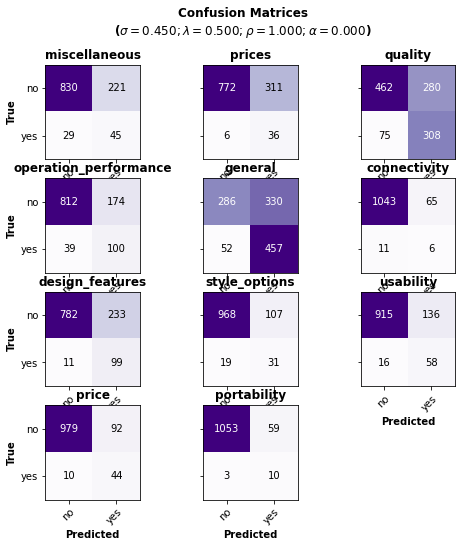

In [3]:
clf = SS3()
clf.fit(X_train, y_train)
score = Evaluation.test(clf, X_val, y_val, metric="f1-score")

<div class="w3-panel w3-orange">
  <h3>Vanilla SS3 -> 0.39 (Macro Avg. F1-Score)</h3>
  <p>With extensive gridsearch, this was improved up to 0.45</p>
</div> 

# N-Gram SS3

Classification: 100%|██████████| 1125/1125 [00:01<00:00, 1073.37it/s]



                       precision    recall  f1-score   support

        miscellaneous       0.19      0.58      0.29        74
               prices       0.11      0.74      0.20        42
              quality       0.55      0.81      0.66       383
operation_performance       0.40      0.69      0.50       139
              general       0.59      0.90      0.71       509
         connectivity       0.09      0.35      0.14        17
      design_features       0.33      0.85      0.48       110
        style_options       0.23      0.62      0.33        50
            usability       0.33      0.68      0.44        74
                price       0.34      0.74      0.47        54
          portability       0.16      0.69      0.26        13

            micro avg       0.40      0.80      0.54      1465
            macro avg       0.30      0.70      0.41      1465
         weighted avg       0.46      0.80      0.58      1465
          samples avg       0.50      0.82      0.57

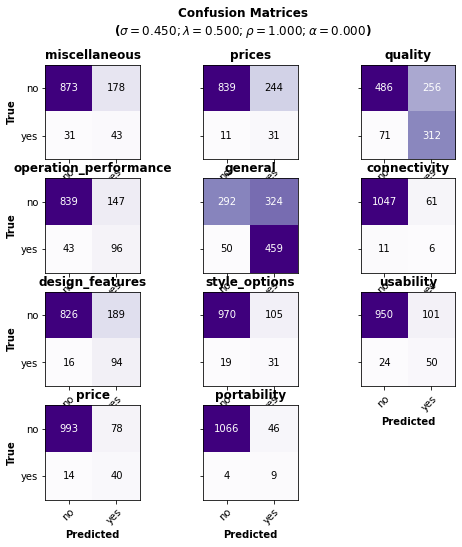

In [4]:
clf = SS3()
clf.fit(X_train, y_train, n_grams=5)
score = Evaluation.test(clf, X_val, y_val, metric="f1-score")

<div class="w3-panel w3-orange">
  <h3>N-Gram SS3 -> 0.41 (Macro Avg. F1-Score)</h3>
  <p>With extensive gridsearch, this was improved up to 0.48</p>
</div> 

# Try different Operators

## Max

Classification: 100%|██████████| 1125/1125 [00:01<00:00, 1012.79it/s]



                       precision    recall  f1-score   support

        miscellaneous       0.15      0.62      0.24        74
               prices       0.08      0.81      0.15        42
              quality       0.52      0.76      0.62       383
operation_performance       0.34      0.70      0.46       139
              general       0.59      0.85      0.70       509
         connectivity       0.06      0.53      0.12        17
      design_features       0.24      0.78      0.36       110
        style_options       0.14      0.70      0.24        50
            usability       0.22      0.66      0.34        74
                price       0.22      0.74      0.33        54
          portability       0.07      0.77      0.12        13

            micro avg       0.31      0.77      0.44      1465
            macro avg       0.24      0.72      0.33      1465
         weighted avg       0.43      0.77      0.53      1465
          samples avg       0.40      0.80      0.48

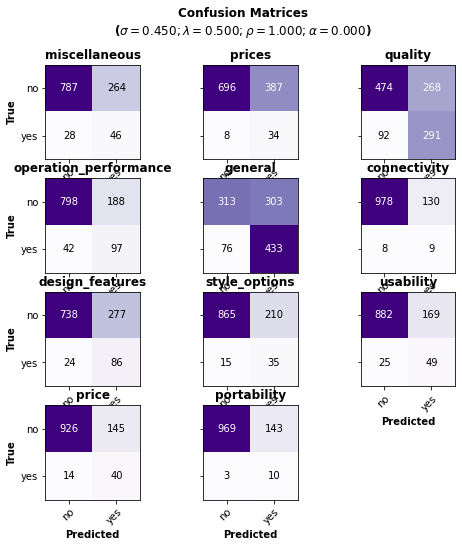

0.3331409992782136

In [5]:
from pyss3.pyss3.__init__ import vsum, vmax, vdiv
from functools import reduce

def op_max(cvs):
  return reduce(vmax, cvs)

clf = SS3()
clf.summary_op_ngrams = op_max
clf.summary_op_sentences = op_max
clf.fit(X_train, y_train, n_grams=5)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

<div class="w3-panel w3-orange">
  <h3>Max Operators SS3 -> 0.33 (Macro Avg. F1-Score)</h3>
  <p>No Gridsearch performed.</p>
</div> 

## Average

Classification: 100%|██████████| 1125/1125 [00:01<00:00, 1063.71it/s]



                       precision    recall  f1-score   support

        miscellaneous       0.20      0.58      0.30        74
               prices       0.11      0.74      0.20        42
              quality       0.55      0.81      0.66       383
operation_performance       0.40      0.69      0.50       139
              general       0.59      0.90      0.71       509
         connectivity       0.09      0.35      0.14        17
      design_features       0.34      0.85      0.48       110
        style_options       0.22      0.60      0.32        50
            usability       0.33      0.68      0.44        74
                price       0.34      0.74      0.47        54
          portability       0.17      0.69      0.27        13

            micro avg       0.40      0.80      0.54      1465
            macro avg       0.30      0.69      0.41      1465
         weighted avg       0.46      0.80      0.58      1465
          samples avg       0.50      0.82      0.58

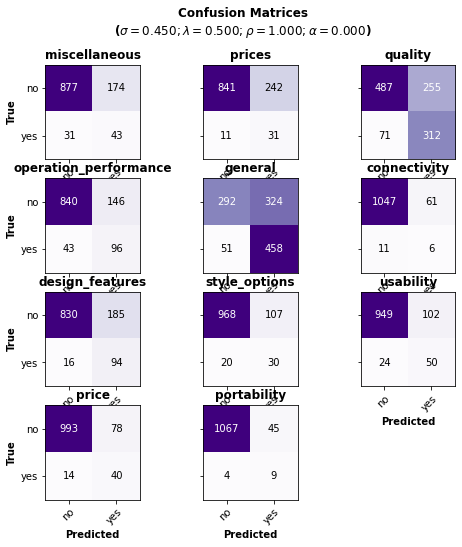

0.40781079744821375

In [6]:
def op_avg(cvs):
  return vdiv(reduce(vsum, cvs), [len(cvs)]*len(cvs[0]))

clf = SS3()
clf.summary_op_ngrams = op_avg
clf.summary_op_sentences = op_avg
clf.fit(X_train, y_train, n_grams=5)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

<div class="w3-panel w3-orange">
  <h3>Average Operators SS3 -> 0.40 (Macro Avg. F1-Score)</h3>
  <p>No Gridsearch performed.</p>
</div> 

# Remove Classes

In [7]:
import pandas as pd
label_counts = pd.Series([label for att_labels in labels for label in att_labels]).value_counts()
print("How often does each label appear?\n")
print(label_counts)

How often does each label appear?

general                  1802
quality                  1233
operation_performance     447
design_features           357
miscellaneous             260
usability                 229
prices                    177
style_options             156
price                     147
connectivity               55
portability                51
dtype: int64


### Remove class "general", "quality" and "connectivity"

Classification: 100%|██████████| 342/342 [00:00<00:00, 1226.30it/s]



                       precision    recall  f1-score   support

            usability       0.36      0.58      0.44        45
                price       0.40      0.75      0.53        28
      design_features       0.43      0.79      0.55        72
operation_performance       0.61      0.86      0.71        84
          portability       0.23      0.67      0.34         9
        style_options       0.36      0.91      0.51        33
        miscellaneous       0.29      0.77      0.43        48
               prices       0.61      0.49      0.54        39

            micro avg       0.42      0.75      0.53       358
            macro avg       0.41      0.73      0.51       358
         weighted avg       0.45      0.75      0.55       358
          samples avg       0.49      0.69      0.53       358


 Exact Match Ratio: 0.269
 Hamming Loss: 0.170
[ updating evaluations cache ]


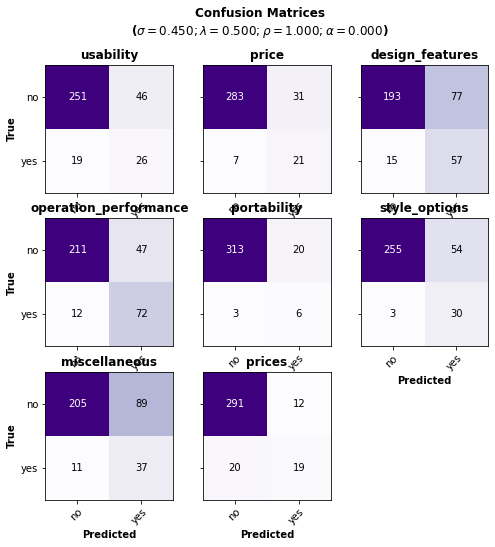

0.507003032933105

In [8]:
def reduce_classes(text, labels, classes):
  reduced_text = []
  reduced_labels = []
  for t, l in zip(text, labels):
    if not set(classes).isdisjoint(set(l)):
      if len(l) == 1:
        continue    
      else:
        for cl in classes:
          try:
            l.remove(cl)
          except:
            _
    reduced_text.append(t)
    reduced_labels.append(l)
  return reduced_text, reduced_labels

reduced_text, reduced_labels = reduce_classes(text, labels, ["general", "quality", "connectivity"]) #["connectivity", "portability", "style_options"]
X_train_red, X_val_red, y_train_red, y_val_red = train_test_split(reduced_text, reduced_labels, test_size=0.2) 

clf = SS3()
clf.fit(X_train_red, y_train_red, n_grams=5, leave_pbar=False)
Evaluation.test(clf, X_val_red, y_val_red, metric="f1-score")

<div class="w3-panel w3-orange">
  <h3>Neglect Classes SS3 -> 0.50 (Macro Avg. F1-Score)</h3>
  <p>With extensive gridsearch, this was improved up to 0.65</p>
</div> 

# Glove
Enhance Dataset by using a pretrained glove embedding

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])
Training:   0%|          | 0/2623 [00:00<?, ?it/s]

Worked: 10627  Failed: 13694
Worked: 4573  Failed: 5717


Classification: 100%|██████████| 1125/1125 [00:05<00:00, 222.61it/s]



                       precision    recall  f1-score   support

        miscellaneous       0.27      0.54      0.36        74
               prices       0.33      0.62      0.43        42
operation_performance       0.42      0.83      0.56       139
              general       0.54      0.89      0.68       370
              quality       0.52      0.76      0.62       245
         connectivity       0.18      0.25      0.21         8
      design_features       0.30      0.90      0.45       110
        style_options       0.26      0.78      0.39        50
            usability       0.37      0.77      0.50        74
                price       0.30      0.93      0.45        54
          portability       0.27      0.31      0.29        13

            micro avg       0.41      0.81      0.55      1179
            macro avg       0.34      0.69      0.45      1179
         weighted avg       0.44      0.81      0.56      1179
          samples avg       0.53      0.78      0.59

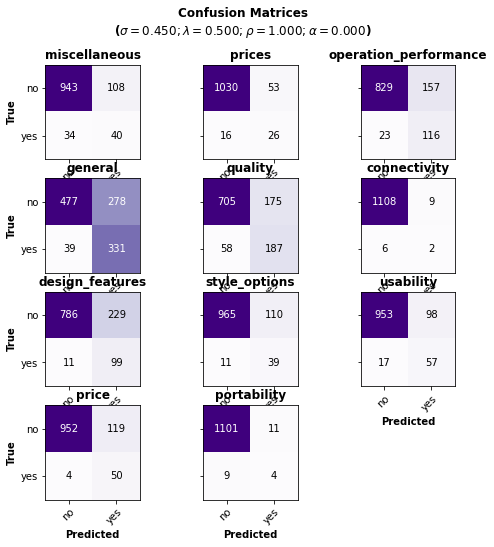

0.44836969857729553

In [9]:
!pip3 install nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import download
from functools import reduce
import json

download('stopwords')
download('punkt')

stop_words = set(stopwords.words('english'))

with open(path_root + data_root + '/vocabulary-attribute/final_mapping.json') as file:
  closest_words = json.load(file)

def tokenize_samples(samples):
  return list(map(word_tokenize, samples))

def filter_stop_words(token_samples):
  return list(map(lambda x: [w for w in x if w not in stop_words], token_samples))

def enhance(dset):
  tok_dset = tokenize_samples(dset)
  fil_dset = filter_stop_words(tok_dset)
  dset_enhanced = []

  failed_counter = 0
  worked_counter = 0

  for index in range(len(dset)):
    sample_enhanced = [dset[index]]
    sample = fil_dset[index]
    for word in sample:
      try:
        sample_enhanced.extend(closest_words[word])
        worked_counter += 1
      except:
        failed_counter += 1
    sample_enhanced = reduce(lambda a,b: a+ " " + b, sample_enhanced)
    dset_enhanced.append(sample_enhanced)

  print("Worked:", worked_counter, " Failed:", failed_counter)
  return dset_enhanced

X_train_enhanced = enhance(X_train)
X_val_enhanced = enhance(X_val)

clf = SS3()
clf.fit(X_train_enhanced, y_train, n_grams=5, leave_pbar=False)
Evaluation.test(clf, X_val_enhanced, y_val, metric="f1-score")

<div class="w3-panel w3-orange">
  <h3>Glove SS3 -> 0.44 (Macro Avg. F1-Score)</h3>
  <p>With extensive gridsearch, this was improved up to 0.55</p>
</div> 